## Chapter 6: Linear Model Selection and Regularization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

### Subset selection methods
### Best subset selection

In [2]:
hitters_df = pd.read_csv('./data/Hitters.csv').dropna()
print(hitters_df.columns)
hitters_df.info()
print (len(hitters_df))
hitters_df.head()

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float6

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
hitters_df["League"] = pd.factorize(hitters_df["League"])[0]
hitters_df["Division"] = pd.factorize(hitters_df["Division"])[0]
hitters_df["NewLeague"] = pd.factorize(hitters_df["NewLeague"])[0]
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [4]:
# construct a baseline regressor with all features
X = hitters_df.drop(["Salary"], axis=1) 
    # Drop the column containing the independent variable
y = hitters_df["Salary"]
lm = LinearRegression()
lm.fit(X, y)
ypred = lm.predict(X)
np.sqrt(mean_squared_error(y, ypred))

303.34447253531619

In [5]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,1


### Best subset regression

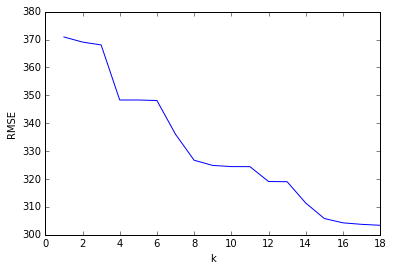

In [6]:
# Scikit-learn provides SlectKBest method to find best features
mses = []
nfeatures = np.arange(1,len(X.columns))
for nfeature in nfeatures:
    # Compute MSE for best set of k predictors for different values of k
    selector = SelectKBest(f_regression, k=nfeature)
    selector.fit(X, y)
    selected = selector.get_support()
    #print (type(X.columns[selected]))
    lm = LinearRegression()
    X_selected = X[X.columns[selected]]
    lm.fit(X_selected,y)
    ypred = lm.predict(X_selected)
    mses.append(np.sqrt(mean_squared_error(y, ypred)))
    
plt.plot(nfeatures, mses)
plt.xlabel('k')
plt.ylabel('RMSE')

### Model selection by cross-validation
We use KFold (K=10) cross-validation

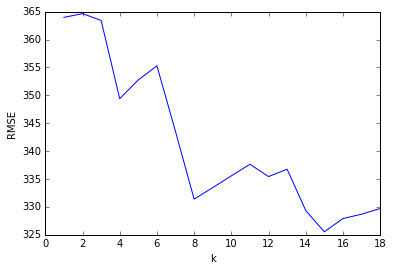

In [7]:
kfold = KFold(len(X), n_folds=10)
cv_errors = []

for nfeature in nfeatures:
    # Compute MSE for best set of k predictors for different values of k
    selector = SelectKBest(f_regression, k=nfeature)
    selector.fit(X, y)
    selected = selector.get_support()
    #print (type(X.columns[selected]))
    lm = LinearRegression()
    Xs = X[X.columns[selected]].values
    ys = y.values
    
    rmses = []
    for train, test in kfold:
        #print ((train), len(test))
        Xtrain, ytrain, Xtest, ytest = Xs[train], ys[train], Xs[test], ys[test]
        lm = LinearRegression()
        lm.fit(Xtrain, ytrain)
        ypred = lm.predict(Xtest)
        rmses.append(np.sqrt(mean_squared_error(ytest, ypred)))
        
    cv_errors.append(np.mean(rmses))

plt.plot(nfeatures, cv_errors)
plt.xlabel('k')
plt.ylabel('RMSE')  

### Ridge and lasso regression 

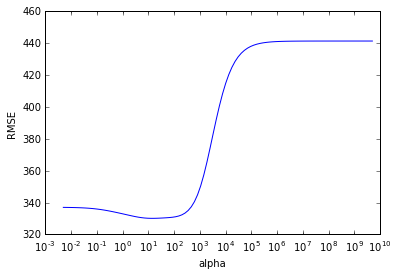

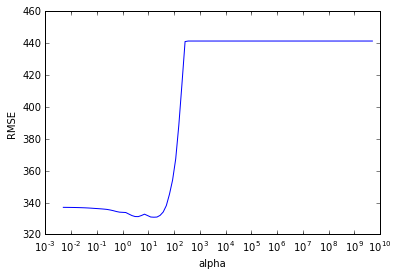

In [8]:
def cross_validate(X, y, nfolds, reg_name, alphas):
    kfold = KFold(len(X), n_folds=nfolds)
    X1 = X[X.columns[selected]].values.astype(float)
    y1 = y.values.astype(float)
    
    cv_errors = []
    if (reg_name=='Ridge'):
        reg = Ridge()
    elif (reg_name=='Lasso'):
        reg = Lasso(max_iter=10000)
    else:
        print ("ERROR")
        return cv_errors

    for alpha in alphas:
        reg.set_params(alpha=alpha)
        rmses = []
        for train, test in kfold:            
            Xtrain, ytrain, Xtest, ytest = X1[train], y1[train], X1[test], y1[test]  
            reg.fit(scale(Xtrain), ytrain)
            ypred = reg.predict(scale(Xtest))
            rmses.append(np.sqrt(mean_squared_error(ytest, ypred)))
        
        cv_errors.append(np.mean(rmses))
        
    return cv_errors


#alphas = 0.1*np.arange(1,200,20)
alphas = 10**np.linspace(10,-2,100)*0.5

nfolds = 10
cv_errors = cross_validate(X, y, nfolds, 'Ridge', alphas)
fig, ax = plt.subplots()
ax.plot(alphas, cv_errors)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')  

plt.figure()
cv_errors = cross_validate(X, y, nfolds, 'Lasso', alphas)
fig, ax = plt.subplots()
ax.plot(alphas, cv_errors)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')  




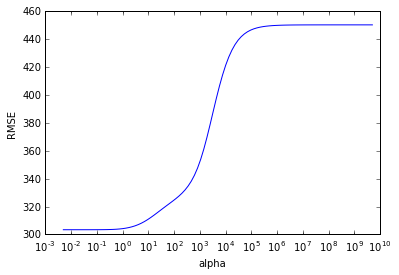

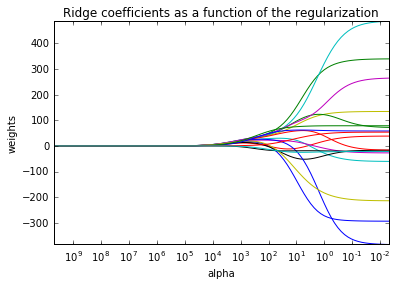

In [9]:
# Ridge regression coefficients as a function of the regularization parameter alpha
alphas = 10**np.linspace(10,-2,100)*0.5

X1 = X[X.columns[selected]].values.astype(float)
y1 = y.values.astype(float)
X1 = scale(X1)

reg = Ridge()
rmses = []
coefs = []
for alpha in alphas:
    reg.set_params(alpha=alpha)
    reg.fit(X1, y1)
    ypred = reg.predict(X1)
    rmses.append(np.sqrt(mean_squared_error(y1, ypred)))
    coefs.append(reg.coef_)
    
fig, ax = plt.subplots()
ax.plot(alphas, rmses)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')  

#ax = plt.gca()
fig, ax = plt.subplots()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');


In [10]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error') # cv=10 => 10-fold CV
X1 = scale(X[X.columns[selected]].values.astype(float))
y1 = y.values.astype(float)
ridgecv.fit(scale(X1),y1)

RidgeCV(alphas=array([  5.00000e+09,   3.78232e+09, ...,   6.60971e-03,   5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='mean_squared_error', store_cv_values=False)

### Principal components regression

In [11]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

print (pca.components_.shape)
pd.DataFrame(pca.components_.T)

(19, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.198290,0.383784,-0.088626,0.031967,-0.028117,0.070646,-0.107044,0.269810,-0.012183,0.145621,0.097328,-0.103150,0.039850,0.306248,-0.532433,0.510331,-0.139342,0.106790,0.053777
1,0.195861,0.377271,-0.074032,0.017982,0.004652,0.082240,-0.130026,0.388722,-0.061604,0.130476,0.014433,-0.121009,-0.003593,0.210616,0.023442,-0.720168,0.167363,-0.043568,-0.097782
2,0.204369,0.237136,0.216186,-0.235831,-0.077660,0.149646,0.505833,-0.226278,0.127422,-0.351111,-0.202190,0.314852,0.108689,-0.001353,-0.355455,-0.200408,-0.047702,0.058377,-0.024805
3,0.198337,0.377721,0.017166,-0.049942,0.038536,0.136660,-0.201764,0.114518,-0.171230,0.032245,-0.312187,0.321700,0.381219,-0.266583,0.468300,0.220518,-0.140946,-0.047050,0.059145
4,0.235174,0.314531,0.073085,-0.138985,-0.024299,0.111675,0.319440,0.005082,0.131146,-0.172233,0.243415,-0.347752,-0.440143,-0.007486,0.461468,0.237366,0.106688,-0.063998,0.019351
5,0.208924,0.229606,-0.045636,-0.130615,0.032495,0.019480,-0.558420,-0.623342,-0.021438,-0.120940,0.176393,-0.185278,-0.041020,-0.237940,-0.176549,-0.102541,0.042240,-0.006655,-0.018030
6,0.282575,-0.262402,-0.034581,0.095312,0.010361,-0.033243,0.012029,0.138314,-0.010645,-0.512507,0.191547,-0.354594,0.605010,0.086080,0.066239,0.024135,0.095586,0.085780,0.020309
7,0.330463,-0.192904,-0.083574,0.091114,-0.011716,-0.024377,-0.012057,0.147030,-0.054657,-0.101137,-0.030238,0.062390,-0.148585,-0.168155,-0.157743,0.056835,-0.182264,-0.720128,-0.409277
8,0.330742,-0.182899,-0.086251,0.083751,-0.008524,-0.029395,-0.020000,0.194547,-0.094925,-0.077220,-0.029848,0.083475,-0.266807,-0.290311,-0.136632,-0.110442,-0.031999,0.003477,0.770272
9,0.318979,-0.126297,0.086272,-0.074278,-0.032652,0.040780,0.228830,-0.249490,0.167949,0.650534,0.079790,-0.074114,0.330107,0.039828,0.009399,0.026816,0.291752,-0.254301,0.166104


In [12]:
print (X_reduced.shape)
print (X_reduced)

(263, 19)
[[ -9.64871922e-03  -1.87052198e+00  -1.26514521e+00 ...,  -8.02161532e-02
   -3.81397452e-02  -1.92500795e-02]
 [  4.11433695e-01   2.42942190e+00   9.09193165e-01 ...,  -4.43434707e-02
   -1.48342246e-02  -3.39451856e-03]
 [  3.46682196e+00  -8.25946988e-01  -5.55469466e-01 ...,   2.18282868e-01
   -3.78251162e-02  -6.65007373e-02]
 ..., 
 [ -1.09460888e+00   7.51385751e-01   9.35936894e-01 ...,   7.87381606e-02
   -6.72009318e-02   1.31936353e-02]
 [  1.97768180e+00   2.18451741e+00   2.82011929e-01 ...,   1.44073449e-02
   -2.29207125e-02  -1.05296972e-02]
 [  1.83300238e+00   3.01096659e-01   1.05532275e+00 ...,   3.02569189e-01
    7.55286689e-02  -4.05988737e-02]]


In [13]:
# Variance explained by each of the principal components 
print (pca.explained_variance_ratio_)
# Cumulative variance explained by the principal components 
print (np.round(np.cumsum(pca.explained_variance_ratio_), decimals=4)*100)

[  3.83142396e-01   2.18410758e-01   1.06863592e-01   8.19251975e-02
   5.25608081e-02   4.34450422e-02   3.62810828e-02   2.70015556e-02
   1.31964802e-02   9.72721749e-03   7.22341252e-03   6.70946072e-03
   5.03086617e-03   3.21246472e-03   2.73557843e-03   1.47396692e-03
   7.41715623e-04   2.55915858e-04   6.24891919e-05]
[  38.31   60.16   70.84   79.03   84.29   88.63   92.26   94.96   96.28
   97.26   97.98   98.65   99.15   99.47   99.75   99.89   99.97   99.99
  100.  ]


[ 258719.82803953  198152.6816008   146824.4084663    99443.671975
  154905.98240765  220130.29708428  159231.53870234  405793.39064845
  215919.7834596   173910.17441485]


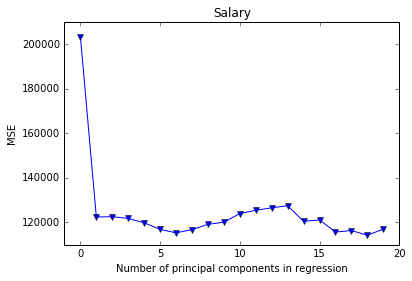

In [14]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error')
print (score)
mse.append(score.mean())

# Calculate MSE using CV for the 19 principal components
for i in np.arange(0,X_reduced.shape[1]):
    score = -1*cross_val_score(regr, X_reduced[:,:i+1], y.ravel(), cv=kf_10, scoring='mean_squared_error')
    mse.append(score.mean())

plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot shows that the lowest training MSE is obtained using 18 components.

### Perform PCA on the training data and evaluate its test set performance

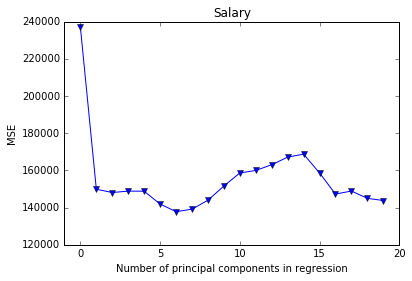

In [15]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# Perform PCA
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))

# K-fold CV
n = len(X_train)
kf_10 = KFold(n, n_folds=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='mean_squared_error')
mse.append(score.mean())

# Calculate MSE using CV for the 19 principal components
for i in np.arange(0,X_test.shape[1]):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i+1], y_train.ravel(), cv=kf_10, scoring='mean_squared_error')
    mse.append(score.mean())

plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

The above plot indicates that the lowest training MSE is reached when using 6 components

#### Transform the test data with PCA loading and fit regression on 6 principal components

In [16]:
X_reduced_test = pca2.transform(scale(X_test)) # Transform

# Train regression model on training data
lm = LinearRegression()
lm.fit(X_reduced_train[:,:7], y_train)

# Prediction with test data
X_reduced_test = X_reduced_test[:,:7] # Select first 6 principal components
ypred = lm.predict(X_reduced_test)
mean_squared_error(y_test, ypred)

111994.42273636992

### Partial Least Squares